In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

In [2]:
#crate paths for csv files
CURR_DIR = os.getcwd()
print(CURR_DIR)
zlecenia_path = os.path.join(CURR_DIR, 'Zlecenia.csv')
godziny_path = os.path.join(CURR_DIR, 'Godziny.csv')
New_Precalc_path = os.path.join(CURR_DIR, 'New_Precalc.csv')

C:\Users\ksobo\Desktop\DS_final_project


In [3]:
#Zaciagniecie baz danych
obciazenie_df = pd.read_csv(zlecenia_path, sep=';')
godziny_df = pd.read_csv(godziny_path, sep=';')
New_Precalc_df = pd.read_csv(New_Precalc_path, sep=';')
New_Precalc_df

,Bin,Labor_rate_A,Labor_rate_B,Labor_rate_C,Mean
0,"(0, 500]",0.45,0.24,0.22,0.30
1,"(500, 1000]",0.20,0.18,0.18,0.18
2,"(1000, 1500]",0.13,0.16,0.12,0.14
3,"(1500, 2000]",0.11,0.12,0.12,0.12
4,"(2000, 2500]",0.07,0.09,0.09,0.08
5,"(2500, 3000]",0.07,0.08,0.09,0.08
6,"(3000, 3500]",0.07,0.07,0.07,0.07
7,"(3500, 4000]",0.07,0.06,0.07,0.07
8,"(4000, 4500]",0.07,0.06,0.07,0.07
9,"(4500, 5000]",0.07,0.07,0.07,0.07


In [4]:
#Ekstrakcja danych i organizacja danych - pozostawienie tylko kolumn wymaganych, pozostawienie tylko projektów "w toku"
obciazenie_df1 = obciazenie_df.drop(columns=['work_preparation_Plan','work_preparation_done'], axis=1)
obciazenie_df2 = obciazenie_df1.loc[obciazenie_df1['Active'].isin(['Active'])]
godziny_df = godziny_df[['No','Wszystkie.technol','Wszystkie.wykonane']]

In [5]:
#Left join po No z godzinami
obciazenie_df2 = pd.merge(obciazenie_df2, godziny_df, how='left', on='No')


#wypelnienie NaN zerami
obciazenie_df2['Wszystkie.technol'] = obciazenie_df2['Wszystkie.technol'].fillna(0)
obciazenie_df2['Wszystkie.wykonane'] = obciazenie_df2['Wszystkie.wykonane'].fillna(0)

In [6]:
#Zdefiniowanie tygodnia obecnego przyjmujemy obecny jako 202112 - tydzień zaciągnięcia danych z baz,
current_week = 202112

In [7]:
#docelowo może zostać zamieniony funkcją obliczającą jak poniżej
#today = datetime.date.today()
#year = today.isocalendar()[0]
#wk = today.isocalendar()[1]
#current_week = int(str(year) + str(wk))
#current_week

In [8]:
#Zmiana terminu rozpoczęcia oraz zakończenia na obecny jeżeli miało mieć ono miejsce w przeszłości
obciazenie_df2.loc[obciazenie_df2['Finnish_week'] < current_week, 'Finnish_week'] = current_week

obciazenie_df2.loc[obciazenie_df2['Pre_fabrication_plan'] < current_week, 'Pre_fabrication_plan'] = current_week

In [9]:
#Zmiana wartości na nowe wskaźniki prekalkulacji

bins = [*range(0, 13000, 500)]

obciazenie_df2['Bin'] = pd.cut(obciazenie_df2['Weight_for_1'], bins, bins)
obciazenie_df2['Bin'] = obciazenie_df2['Typ'].astype(str) + obciazenie_df2['Bin'].astype(str)

In [10]:
Labor_rate_A = New_Precalc_df[['Bin','Labor_rate_A']]
Labor_rate_A.columns = ['Bin', 'Work_rate']
Labor_rate_A['Bin'] = "A" + Labor_rate_A['Bin'].astype(str)

<ipython-input-10-9c3f1aaeb31f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labor_rate_A['Bin'] = "A" + Labor_rate_A['Bin'].astype(str)


In [11]:
Labor_rate_B = New_Precalc_df[['Bin','Labor_rate_B']]
Labor_rate_B.columns = ['Bin', 'Work_rate']
Labor_rate_B['Bin'] = "B" + Labor_rate_B['Bin'].astype(str)

<ipython-input-11-ac521bc0d6e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labor_rate_B['Bin'] = "B" + Labor_rate_B['Bin'].astype(str)


In [12]:
Labor_rate_C = New_Precalc_df[['Bin','Labor_rate_C']]
Labor_rate_C.columns = ['Bin', 'Work_rate']
Labor_rate_C['Bin'] = "C" + Labor_rate_C['Bin'].astype(str)

<ipython-input-12-57063fa01740>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labor_rate_C['Bin'] = "C" + Labor_rate_C['Bin'].astype(str)


In [13]:
Labor_rate = Labor_rate_A.append(Labor_rate_B)
Labor_rate = Labor_rate.append(Labor_rate_C)
Labor_rate

,Bin,Work_rate
0,"A(0, 500]",0.45
1,"A(500, 1000]",0.20
2,"A(1000, 1500]",0.13
3,"A(1500, 2000]",0.11
4,"A(2000, 2500]",0.07
...,...,...
20,"C(10000, 10500]",0.09
21,"C(10500, 11000]",0.09
22,"C(11000, 11500]",0.06
23,"C(11500, 12000]",0.07


In [14]:
obciazenie_df2 = pd.merge(obciazenie_df2, Labor_rate, how='left', on='Bin')

# Wszystkie technol = NaN -> Weight for 1 * Quantity * Typ

obciazenie_df2.loc[obciazenie_df2['Wszystkie.technol'] == 0, 'Wszystkie.technol'] = obciazenie_df2['Weight_for_1'] * obciazenie_df2['Quantity'] * obciazenie_df2['Work_rate']

obciazenie_df2

,No,Description,Weight_for_1,Quantity,Typ,Finnish_week,Active,Pre_fabrication_plan,Wszystkie.technol,Wszystkie.wykonane,Bin,Work_rate
0,191,3130,6400,1,B,202112,Active,202112,380.0,424.5,"B(6000, 6500]",0.08
1,192,3130,6400,1,B,202123,Active,202112,423.5,507.5,"B(6000, 6500]",0.08
2,870,2016,2420,2,C,202146,Active,202112,372.0,462.5,"C(2000, 2500]",0.09
3,908,2016,2420,2,C,202146,Active,202112,372.0,116.0,"C(2000, 2500]",0.09
4,1015,1360,890,2,A,202112,Active,202112,225.2,160.5,"A(500, 1000]",0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
58,1268,3230,6400,1,B,202234,Active,202218,512.0,0.0,"B(6000, 6500]",0.08
59,1269,3230,6400,1,B,202244,Active,202236,512.0,0.0,"B(6000, 6500]",0.08
60,1270,3230,6400,1,B,202307,Active,202249,512.0,0.0,"B(6000, 6500]",0.08
61,1271,3230,6400,1,B,202319,Active,202311,512.0,0.0,"B(6000, 6500]",0.08


In [15]:
#Obliczenie kolumn - pozostałego czasu na produkcję oraz pozostałych godzin
obciazenie_df2['Weeks_left'] = (obciazenie_df2['Finnish_week']) - (obciazenie_df2['Pre_fabrication_plan'])

#Jeżeli >52 to należy odjąc od wyniku 48 (100 - (ilość tyg w danym roku - def 52))
#Może tak się stać dla projektów na przełomie roku 202206-202146 = 60!
obciazenie_df2.loc[obciazenie_df2['Weeks_left'] > 52, 'Weeks_left'] = obciazenie_df2['Weeks_left'] - 48

#Jeżeli zlecenie jest opóźnione i wynik pozostałego czasu będzie wynosił 0
#to zostanie on doliczony do obecnego tygodnia
obciazenie_df2.loc[obciazenie_df2['Weeks_left'] < 1, 'Weeks_left'] = 1

#funkcja if niestety nie znalazła odpowiedniego zastosowania - loc jest polecany jako dobra praktyka

In [16]:
#Wyliczenie pozostałych godzin pracy
obciazenie_df2['Work_h_left'] = (obciazenie_df2['Wszystkie.technol']) - (obciazenie_df2['Wszystkie.wykonane'])

#Jeżeli zlecenie przekroczyło godziny praca liczona jest w nadgodzinach - przyjmuje się 0 do obciażenia
obciazenie_df2.loc[obciazenie_df2['Work_h_left'] < 0, 'Work_h_left'] = 0

In [17]:
#Podzielenie pozostałej pracy równomiernie na tygodnie i dodanie do dt
obciazenie_df2['Workload_per_week'] = (obciazenie_df2['Work_h_left']) / (obciazenie_df2['Weeks_left'])
obciazenie_df2['Workload_per_week'].astype(int)

0      0
1      0
2      0
3      7
4     64
      ..
58    32
59    64
60    51
61    64
62    64
Name: Workload_per_week, Length: 63, dtype: int32

In [18]:
#Dodanie obciazenia zarezerwowanego na dany tydzien w zależności od rozpoczecia i zakonczenia danego zlecenia.
#Wykorzystanie zmiennej current_week_loop w funkcji if - aby w tygodniach na przełomie roku pokazywała poprawne oznaczenia tygodni.

for i in range (0,13):
    current_week_loop = current_week+i
    conditions = [
        (obciazenie_df2['Pre_fabrication_plan'] <= current_week_loop) & (obciazenie_df2['Finnish_week'] >= current_week_loop),
        (obciazenie_df2['Pre_fabrication_plan'] > current_week_loop) & (obciazenie_df2['Finnish_week'] < current_week_loop)]
    choices = [1, 0]
    
    if current_week_loop > 202153 :
        current_week_loop += 48
    else :
        current_week_loop
        
    obciazenie_df2[current_week_loop] = np.select(conditions, choices, default='0') 

In [19]:
#Wykonanie tabeli z ostatecznymi wynikami
obciazenie_df3 = obciazenie_df2.iloc[: ,-14:].astype(int)
obciazenie_result = obciazenie_df3.iloc[: ,-13:].multiply(obciazenie_df3['Workload_per_week'], axis="index")
obciazenie_result_df = pd.DataFrame({'Required Manpower': obciazenie_result.sum(axis=0)}).astype(int)

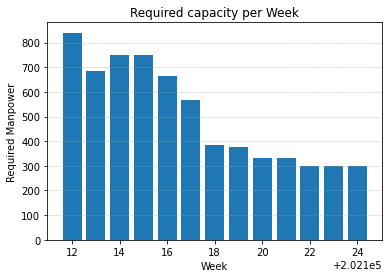

In [20]:
#Wykres plotly
obciazenie_result_df['Week'] = obciazenie_result_df.index
plt.bar(obciazenie_result_df['Week'], obciazenie_result_df['Required Manpower'])
plt.xlabel('Week')
plt.ylabel('Required Manpower')
plt.title('Required capacity per Week')
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.xscale('linear')

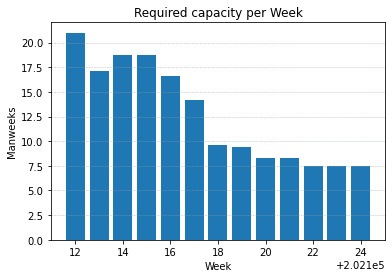

In [21]:
#W celu ułatwienia analiz obciążenia wielu pracodawców stosuje w obliczeniach jednostkę Manweek = 40 rbg / tydzień
obciazenie_result_df['Manweeks'] = obciazenie_result_df['Required Manpower']/40
obciazenie_result_df['Week'] = obciazenie_result_df.index
plt.bar(obciazenie_result_df['Week'], obciazenie_result_df['Manweeks'])
plt.xlabel('Week')
plt.ylabel('Manweeks')
plt.title('Required capacity per Week')
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.xscale('linear')